# Uniform Random Variables: Legendre Polynomials

Created by Kanishka Ghosh (kghosh@nd.edu)

The following text, example, and code have been adapted from:

McClarren, Ryan G (2018). *Uncertainty Quantification and Predictive Computational Science: A Foundation for Physical Scientists and Engineers, Chapter 9: Stochastic Collocation and Projection*, Springer, [https://link.springer.com/chapter/10.1007/978-3-319-99525-0_9](https://link.springer.com/chapter/10.1007/978-3-319-99525-0_9)

In [1]:
# Download figures (if needed)
import os, requests, urllib

# GitHub pages url
url = "https://ndcbe.github.io/cbe67701-uncertainty-quantification/"

# relative file paths to download
# this is the only line of code you need to change
file_paths = ['figures/Fig-9.4_Table-9.7.png']

# loop over all files to download
for file_path in file_paths:
    print("Checking for",file_path)
    # split each file_path into a folder and filename
    stem, filename = os.path.split(file_path)
    
    # check if the folder name is not empty
    if stem:
        # check if the folder exists
        if not os.path.exists(stem):
            print("\tCreating folder",stem)
            # if the folder does not exist, create it
            os.mkdir(stem)
    # if the file does not exist, create it by downloading from GitHub pages
    if not os.path.isfile(file_path):
        file_url = urllib.parse.urljoin(url,
                urllib.request.pathname2url(file_path))
        print("\tDownloading",file_url)
        with open(file_path, 'wb') as f:
            f.write(requests.get(file_url).content)
    else:
        print("\tFile found!")

Checking for figures/Fig-9.4_Table-9.7.png
	Creating folder figures


## Generalized Polynomial Chaos
Approach to approximate the mapping from input parameter to output random variable using different polynomial expansions when the input parameter is not normally distributed.

## Uniform Random Variables: Legendre Polynomials
(adapted from McClarren 2018)

If we consider a random variable $x$ is uniformly distributed in the range $[a,b]$, then $x$ can be written as $x \sim \mathcal{U}[a,b]$ and the PDF of $x$ is given as:

<br>

\begin{align*}
f(x|a,b) = \begin{cases}
\frac{1}{b-a} \quad x \in [a,b]\\
0 \quad \quad \mathrm{otherwise}
\end{cases}
\end{align*}

<br>
  
To correspond with the support with the standard definition of Legendre polynomials, the interval $[a,b]$ is mapped to $[-1,1]$ by defining random variable $z$ such that $z \sim \mathcal{U}[-1,1]$. $x$ and $z$ are related as:

<br>

\begin{align*}
x = \frac{b-a}{2}z + \frac{a+b}{2} \quad \mathrm{and}, \ z = \frac{a+b-2x}{a-b}
\end{align*}

<br>

Then, the expectation of a uniform random variable $g(x)$ transforms to:
 
 <br>

\begin{align*}
E[g(x)] = \frac{1}{b-a} \int\limits_{a}^{b}g(x)dx = \frac{1}{2} \int\limits_{-1}^{1}g \left(\frac{b-a}{2}z + \frac{a+b}{2} \right)dz
\end{align*}

<br>

For a function in range $[-1,1]$, the Legendre polynomials form an orthogonal basis and are defined as:

<br>

\begin{align*}
P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} \left[ (x^2 - 1)^n \right]
\end{align*}

<br>

where $n$ is the order of the polynomial.

<br>

The expansion of a square-integrable function $g(x)$ on the interval $[a,b]$ in terms of Legrende polynomials is then given as:

<br>

\begin{align*}
g(x) = \sum_{n=0}^{\infty} c_n P_n \left( \frac{a+b-2x}{a-b}\right), \quad x \in [a,b]
\end{align*}

<br>

where $c_n$ is defined by

\begin{align*}
c_n = \frac{2n+1}{2} \int\limits_{-1}^{1}g \left( \frac{b-a}{2}z + \frac{a+b}{2} \right)P_n(z)dz
\end{align*}

<br>

As $P_0(x) = 1$ (from Table 9.6 of text), $c_0$ gives the mean of the expansion $G \sim g(x)$

<br>

\begin{align*}
c_0 = \frac{1}{2}\int\limits_{-1}^{1}g \left( \frac{b-a}{2}z + \frac{a+b}{2} \right)dz = E[G]
\end{align*}

<br>

The variance of the expansion G is equivalent to the sum of the squares of the Legendre polynomial coefficients with $n \geq 1$:

<br>

\begin{align*}
\mathrm{Var}(G) = \frac{1}{2}\int\limits_{-1}^{1} \left( \sum_{n=1}^{\infty}c_n P_n (z) \right)^2 dz - c_0^2 = \sum_{n=1}^{\infty}\frac{c_n^2}{2n+1}
\end{align*}

## Example: $G \sim g(x) = cos(x)$ and $x \sim \mathcal{U}(0,2\pi)$

The Legendre polynomial coefficients are given as:

<br>

\begin{align*}
c_n = \frac{2n+1}{2}\int\limits_{-1}^{1}\cos(\pi z+\pi)P_n(z)dz
\end{align*}

<br>

The variance of this function is given as:

<br>

\begin{align*}
\mathrm{Var}(G) = \frac{1}{2\pi}\int\limits_{0}^{2\pi}\cos^2(x)dx = \frac{1}{2}
\end{align*}

The $n^{\mathrm{th}}$-order approximations for $G$ using Legendre polynomials can be represented by $G_{approx,n}$ and are calculated as:

<br>

\begin{align*}
G_{approx,n} = \sum_{n=0}^{n} c_n P_n \left( \frac{a+b-2x}{a-b}\right), \quad x \in [a,b]
\end{align*}

<br>

and the corresponding variance is given by:

<br>

\begin{align*}
\mathrm{Var}(G_{approx,n}) = \sum_{n=1}^{n}\frac{c_n^2}{2n+1}
\end{align*}

<br>

## Results from Textbook

Following is a screenshot of the results presented in the text (Pg. 201, Table 9.7 and Fig. 9.4):

![Figure1](figures/Fig-9.4_Table-9.7.png)

**Implementation Notes:**
*  In this implementation, ```scipy.specials.eval_legendre()``` has been used evaluate the $n^{\mathrm{th}}$-order Legendre polynomial
[https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_legendre.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_legendre.html)
*   To reduce runtime, 1000 samples of $x \sim \mathcal{U}(0,2\pi)$ have been used for the following calculations

## Importing libraries

In [2]:
## import all needed Python libraries here
import numpy as np
import pandas as pd
from scipy.stats import uniform
from scipy.special import legendre,eval_legendre
# from scipy.misc import derivative
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Functions to calculate exact and $n^{\mathrm{th}}$-order Legendre polynomial approximation of $g(x)$

In [3]:
def g_x_exact(x):
    '''
    Function to create the exact form of the random variable, g(x), 
    being approximated
    Argument:
        x: Random variable from uniform distribution U[a,b]
    Return:
        Exact form of the random variable, g(x), being approximated (Here, cos(x))
    '''
    return np.cos(x)

def transform_z_to_x(z,a,b):
    '''
    Helper function to return x in terms of z (Eq. 9.16 of text)
    Arguments:
        z: Random variable from uniform distribution U[-1,1]
        a: Lower limit of uniform random variable x
        b: Upper limit of uniform random variable x
    Returns:
        x: Random variable from uniform distribution U[a,b] in terms of z
    '''
    return ((b-a)/2)*z + (a+b)/2

def transform_x_to_z(x,a,b):
    '''
    Helper function to return z in terms of x (Eq. 9.17 of text)
    Arguments:
        x: Random variable from uniform distribution U[a,b]
        a: Lower limit of uniform random variable x
        b: Upper limit of uniform random variable x
    Returns:
        z: Random variable from uniform distribution U[-1,1] in terms of x
    '''
    return (a+b - 2*x)/(a-b)

def coef_n(a,b,n):
    '''
    Function to generate the Legendre polynomial coefficient of order n
    Argument:
        a: Lower limit of uniform random variable x
        b: Upper limit of uniform random variable x
        n: Order of Legendre polynomial
    Return:
        n-th order Legendre polynomial coefficient (Eq. 9.22 of text)
    ''' 
    # Create a lambda function to return the integrand in terms of z as shown in
    # Eq. 9.22 of text.
    # Here, scipy.special.eval_legendre() has been used to evaluate the n-th 
    # order Legendre polynomial
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_legendre.html
    integrand_func = lambda z: g_x_exact(transform_z_to_x(z,a,b))* \
                               eval_legendre(n,z)
    val,err = integrate.quad(integrand_func,-1,1)
    return ((2*n + 1)/2)* val

def g_x_approximation(x,a,b,n):
    '''
    Function to generate the n-th order Legendre polynomial expansion of the 
    random variable g(x), from Eq. 9.21 in text
    Arguments:
        x: Random variable from uniform distribution U[a,b]
        a: Lower limit of uniform random variable x
        b: Upper limit of uniform random variable x
        n: Order of Legendre polynomial
    Return:
        n-th order Legendre polynomial expansion of g(x) (Eq. 9.21 of text)
    '''
    # calculating z in terms of x
    z = transform_x_to_z(x,a,b)
    # n-th order approximation of g(x)
    expansion_sum = 0
    # sum over 0 to n-th order Legendre polynomials following from Eq. 9.21 of text
    for n_ in range(n+1):
        expansion_sum += coef_n(a,b,n_) * eval_legendre(n_,z)
    return expansion_sum

## Function to calculate $\mathrm{Var}(g(x))$, $E[G]$, and $\mathrm{Var}(G)$

In [4]:
def var_G_inf(a,b):
    '''
    Function to calculate the infinite-order approximation of variance of g(x) 
    following Eq. 9.27 of text
    Arguments:
        a: Lower limit of uniform random variable x
        b: Upper limit of uniform random variable x
    Return:
        Variance of g(x)
    '''
    # Var(g(x))
    # lambda function to define integrand g(x)^2
    integrand_func = lambda x: g_x_exact(x)**2
    val, err = integrate.quad(integrand_func,a,b)
    return (1/(b-a)) * val

def mean_G(a,b):
    '''
    Function to calculate the mean of the Legendre polynomial expansion G of g(x) 
    following Eq. 9.23 of text
    Arguments:
        a: Lower limit of uniform random variable x
        b: Upper limit of uniform random variable x
    Return:
        Variance of G
    '''
    # lambda function to define integrand g(x)
    integrand_func = lambda x: g_x_exact(x)
    val, err = integrate.quad(integrand_func,a,b)
    return (1/(b-a)) * val

# function to calculate variance of G ~ g(x)
def var_G_approximation(a,b,n):
    '''
    Function to calculate the variance of the n-th order Legendre polynomial 
    expansion of g(x) following Eq. 9.24 of text
    Arguments:
        a: Lower limit of uniform random variable x
        b: Upper limit of uniform random variable x
        n: Highest order of Legendre polynomial used for the 
    Return:
        Variance of n-th order Legendre polynomial expansion G of g(x)
    '''
    # Var(G(approx,n))
    sum_sq_coef = 0
    # sum of the squares coefficients with n  >= 1
    for n_ in range(n+1):
        if n_ == 0:
            pass
        else:
            sum_sq_coef += (1/(2*n_ + 1))*coef_n(a,b,n_)**2
    return sum_sq_coef

## Generating samples from $\mathcal{U}[0,2\pi]$

In [5]:
# Number of samples to dram from uniform distribution (1000 samples to reduce computation time)
n_samples = 1000
# Lower bound of interval for x~ U[0,2pi]
a = 0
# Upper bound of interval for x~ U[0,2pi]
b = 2*np.pi
# Orders of Legendre polynomials used for the approximation
n_vals = [0,2,4,6,8]
# n_samples number of samples drawn from U[0,1)
uniform_samples = np.random.random_sample(n_samples)
# Samples of x drawn from uniform distribution U[0,2pi)
x_vals = [(b - a) * u_samp + a for u_samp in uniform_samples]

## Convergence of variance for $g(x) = cos(x)$, where $ x \sim \mathcal{U} (0, 2\pi )$

In [6]:
# List to store variance of Legendre polynomial approximations of g(x)
var_G_list = []
# List to store order of approximations of g(x) as strings
n_val_list = []

# Loop through the different order-cases which are used to approximate g(x)
for n in n_vals:
    # Calculate variance for n-order approximation of g(x)
    var_G_approx_n = var_G_approximation(a,b,n)
    # Store n-order approximation in variance list
    var_G_list.append(var_G_approx_n)
    # Store string format of order of approximation in order list
    n_val_list.append(str(n))

# Calculate infinite-order variance of g(x)
var_G = var_G_inf(a,b)
# Add infinite-order variance to variance list
var_G_list.append(var_G)
# Add order infinity to order list
n_val_list.append('Infinity')

# Create a pandas dataframe to display the converge of Var(G)
variance_data = {'Order':n_val_list,'Variance':var_G_list}
df_to_print = pd.DataFrame(variance_data,columns=['Order','Variance'])
df_to_print

,Order,Variance
0,0,0.000000
1,2,0.461969
2,4,0.499663
3,6,0.499999
4,8,0.500000
5,Infinity,0.500000


## Approximate $g(x)$ using different orders of Legendre polynomials

In [7]:
# Evaluate exact values (order = infinity) of g(x) for samples of x generated
g_x_exact_vals = [g_x_exact(x) for x in x_vals]

# Evaluate 2nd-order approximation of g(x) for samples of x generated
g_x_approx_n_2 = [g_x_approximation(x,a,b,2) for x in x_vals]

# Evaluate 4th-order approximation of g(x) for samples of x generated
g_x_approx_n_4 = [g_x_approximation(x,a,b,4) for x in x_vals]

# Evaluate 6th-order approximation of g(x) for samples of x generated
g_x_approx_n_6 = [g_x_approximation(x,a,b,6) for x in x_vals]

# Evaluate 8th-order approximation of g(x) for samples of x generated
g_x_approx_n_8 = [g_x_approximation(x,a,b,8) for x in x_vals]

## Plot PDF of the random variable $g(x) = \cos(x)$, where $x \sim \mathcal{U}(0, 2\pi)$, and various approximations

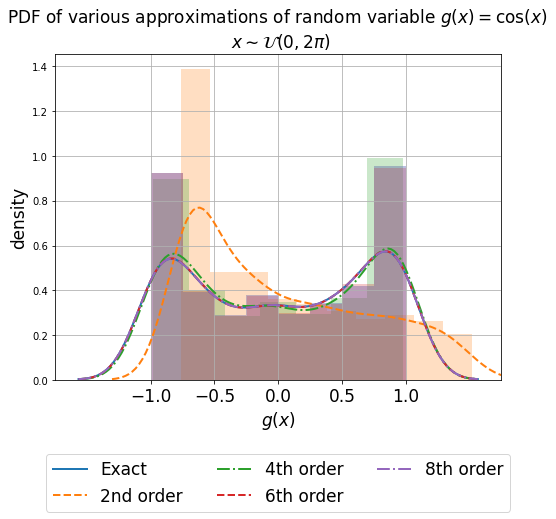

In [8]:
# Plot the distributions
plt.figure(figsize=(8,6))
# Exact values
sns.distplot(g_x_exact(x_vals),
             kde_kws = {'linewidth': 2,'label' : 'Exact'},
             hist_kws = {'alpha':0.25,'linewidth':2})
# Order 2 approximation
sns.distplot(g_x_approx_n_2,
             kde_kws = {'linewidth': 2,'linestyle':'dashed','label' : '2nd order'},
             hist_kws = {'alpha':0.25,'linewidth':1})
# Order 4 approximation
sns.distplot(g_x_approx_n_4,
             kde_kws = {'linewidth': 2,'linestyle':'dashdot','label' : '4th order'},
             hist_kws = {'alpha':0.25,'linewidth':1})
# Order 6 approximation
sns.distplot(g_x_approx_n_6,
             kde_kws = {'linewidth': 2,'linestyle':'dashed','label' : '6th order'},
             hist_kws = {'alpha':0.25,'linewidth':1})
# Order 8 approximation
sns.distplot(g_x_approx_n_8,
             kde_kws = {'linewidth': 2,'linestyle':'dashdot','label' : '8th order'},
             hist_kws = {'alpha':0.25,'linewidth':1})

plt.xlim(-1.75,1.75)
plt.xlabel('$g(x)$', fontsize = 17)
plt.ylabel('density', fontsize = 17)
plt.xticks([-1,-0.5,0,0.5,1], fontsize = 17)
plt.title('PDF of various approximations of random variable $g(x) = \cos(x)$ \n $x \sim \mathcal{U}(0,2\pi)$',fontsize = 17)
plt.grid()
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2),ncol=3,fontsize = 17)
plt.show()

**Note:** The second order approximation returns $\cos(x)$ values in excess of 1.  I am not sure why this is happening (similar behavior can be seen in Fig. 9.4 in the text)